In [1]:
!git clone https://github.com/AlexKly/Detailed-NER-Dataset-RU.git

Cloning into 'Detailed-NER-Dataset-RU'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 34 (delta 9), reused 31 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 458.35 KiB | 1.65 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

path_ds = 'Detailed-NER-Dataset-RU/dataset/detailed-ner_dataset-ru.pickle'
train_df = pd.read_pickle(path_ds)

In [2]:
train_df.head()


tokens  \
0  [dnsmasq, , 3753720, , , , , , , 1, , 0, Mar10...   
1                             [2022-09-09, 12:37:10]   
2                                   [–ü–æ–≤–∞—Ä, —Å—É–¥–æ–≤–æ–π]   
3                        [–ø—Ä–æ—Ñ–∏–ª–∏—Ä–æ–≤–∞–Ω–∏–µ:, SafeData]   
4  [–ö–æ—Ä–∞–±–ª–µ—Å—Ç—Ä–æ–µ–Ω–∏–µ,, –æ–∫–µ–∞–Ω–æ—Ç–µ—Ö–Ω–∏–∫–∞, –∏, —Å–∏—Å—Ç–µ–º–æ—Ç–µ...   

                                            ner_tags  
0  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
1                                             [O, O]  
2                                             [O, O]  
3                                             [O, O]  
4                              [O, O, O, O, O, O, O]

In [3]:
train_df.shape

(7532, 2)

# EDA

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (7532, 2)

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    7532 non-null   object
 1   ner_tags  7532 non-null   object
dtypes: object(2)
memory usage: 117.8+ KB
None

–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤:
                 tokens ner_tags
count              7532     7532
unique             6736     1030
top     [—Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ]      [O]
freq                 16     1741

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
tokens      0
ner_tags    0
dtype: int64


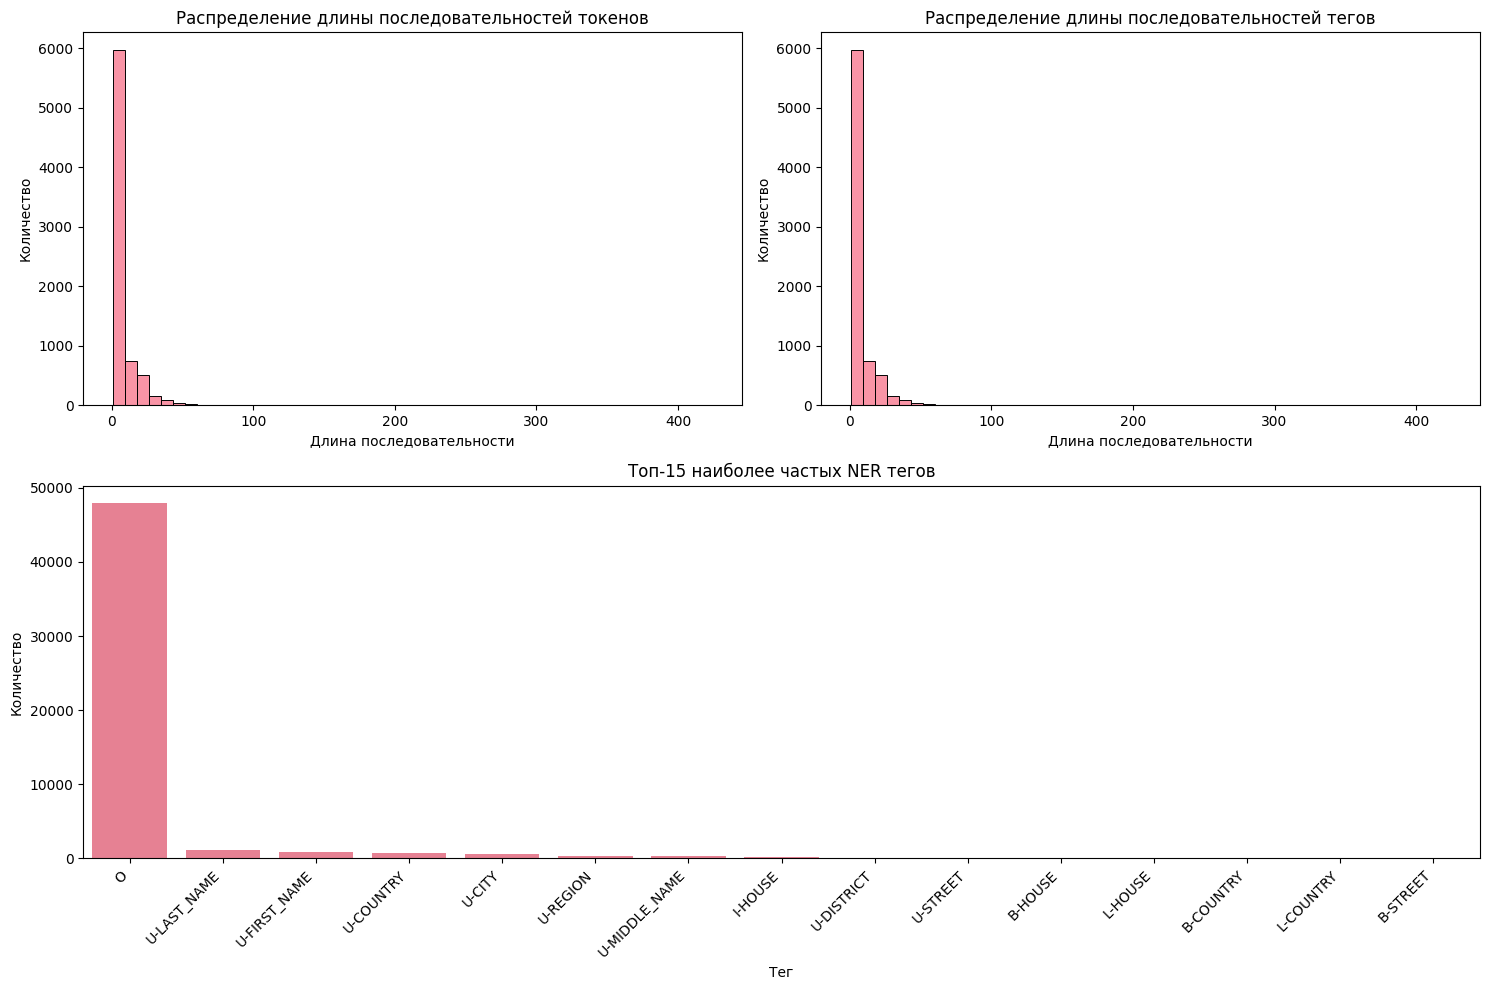


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–ª–∏–Ω–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π:
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: 7.02
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: 424
–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: 1

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤: 34


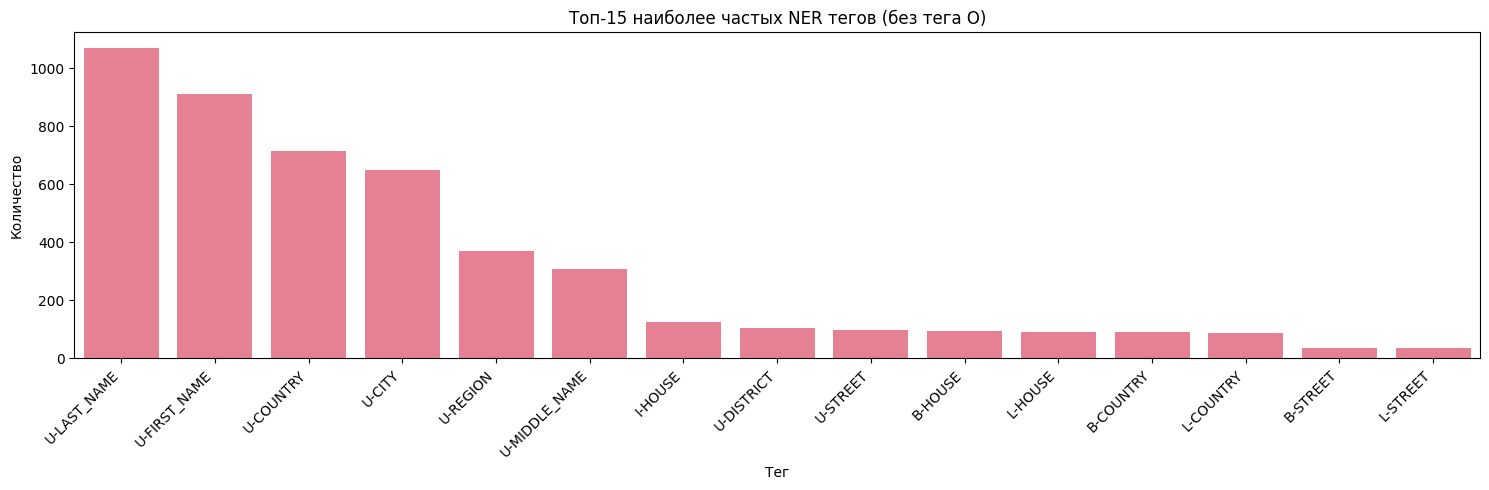


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤ (–±–µ–∑ O): 33


In [3]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
# plt.style.use('seaborn')
sns.set_palette("husl")

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# –ó–∞–º–µ–Ω–∏—Ç–µ 'your_data.csv' –Ω–∞ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É —Ñ–∞–π–ª—É —Å –¥–∞–Ω–Ω—ã–º–∏
df = train_df

# –ë–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:", df.shape)
print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
print(df.info())
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤:")
print(df.describe())

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
print(df.isnull().sum())

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
def get_sequence_lengths(sequences):
    return [len(seq) for seq in sequences]

# –ê–Ω–∞–ª–∏–∑ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
token_lengths = get_sequence_lengths(df['tokens'])
tag_lengths = get_sequence_lengths(df['ner_tags'])

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(15, 10))

# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª–∏–Ω —Ç–æ–∫–µ–Ω–æ–≤
plt.subplot(2, 2, 1)
sns.histplot(token_lengths, bins=50)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π —Ç–æ–∫–µ–Ω–æ–≤')
plt.xlabel('–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª–∏–Ω —Ç–µ–≥–æ–≤
plt.subplot(2, 2, 2)
sns.histplot(tag_lengths, bins=50)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π —Ç–µ–≥–æ–≤')
plt.xlabel('–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

# –ü–æ–¥—Å—á–µ—Ç —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤
all_tags = [tag for tags in df['ner_tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–≥–æ–≤
plt.subplot(2, 1, 2)
sns.barplot(x=tag_counts.index[:15], y=tag_counts.values[:15])
plt.title('–¢–æ–ø-15 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö NER —Ç–µ–≥–æ–≤')
plt.xticks(rotation=45, ha='right')
plt.xlabel('–¢–µ–≥')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

plt.tight_layout()
plt.show()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è–º
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–ª–∏–Ω–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π:")
print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: {np.mean(token_lengths):.2f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: {np.max(token_lengths)}")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–æ–≤: {np.min(token_lengths)}")
print(f"\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤: {len(set(all_tags))}")

# –ü–æ–¥—Å—á–µ—Ç —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤ –±–µ–∑ 'O'
tags_without_o = [tag for tag in all_tags if tag != 'O']
tag_counts_without_o = pd.Series(tags_without_o).value_counts()

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Ç–µ–≥–æ–≤ –±–µ–∑ 'O'
plt.figure(figsize=(15, 5))
sns.barplot(x=tag_counts_without_o.index[:15], y=tag_counts_without_o.values[:15])
plt.title('–¢–æ–ø-15 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö NER —Ç–µ–≥–æ–≤ (–±–µ–∑ —Ç–µ–≥–∞ O)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('–¢–µ–≥')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.tight_layout()
plt.show()

print(f"\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–µ–≥–æ–≤ (–±–µ–∑ O): {len(set(tags_without_o))}")



# Natasha


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è Natasha:
–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9363
–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: 0.5479


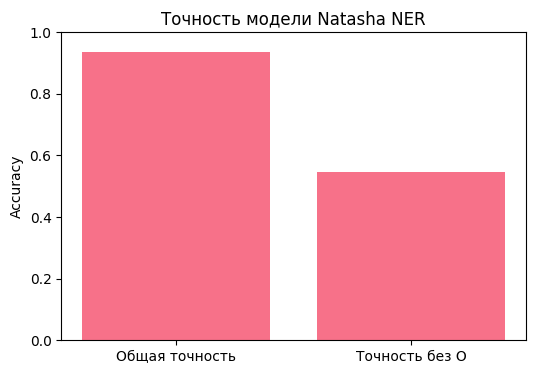

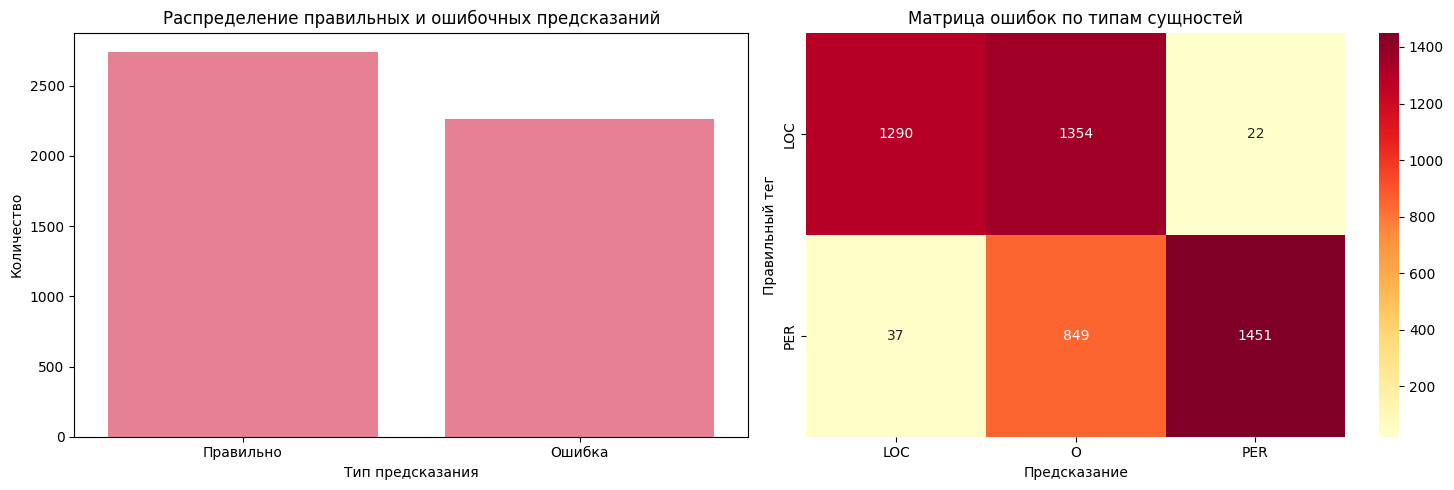


–ü—Ä–∏–º–µ—Ä—ã –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:
           –¢–æ–∫–µ–Ω –ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
56   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC          LOC
189        –û–º—Å–∫–∞            LOC          LOC
220      –ö—Ä–∞—Å–Ω–æ–π            LOC          LOC
221      –ø–ª–æ—â–∞–¥–∏            LOC          LOC
223       –ú–æ—Å–∫–≤–∞            LOC          LOC

–ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:
           –¢–æ–∫–µ–Ω –ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
61   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC            O
63   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC            O
139    –†–æ—Å—Å–∏–∏¬ª\n            LOC            O
141       –õ–µ–Ω–∏–Ω–∞            LOC            O
143           –¥.            LOC            O


In [7]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsNERTagger,
    Doc
)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

unique_tags = {'LOC', 'PER'}
LOC_TAGS = ['COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE']
PER_TAGS = ['LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME']

def detailed2default(tags: list) -> list:
    """ Replace NER-tags to default: LOC and PER.

    Map of default tags:

    LOC: 'COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE'

    PER: 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME'

    :param tags: NER-tags for text tokens.
    :return: Relabeled NER-tokens.
    """
    return [f'LOC' if tag.split('-')[-1] in LOC_TAGS else
            f'PER' if tag.split('-')[-1] in PER_TAGS else
            tag for tag in tags]


# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ Natasha
def evaluate_model(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        # Natasha
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_ner(ner_tagger)
        
        # –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ç–µ–≥–æ–≤ —Ç–æ–π –∂–µ –¥–ª–∏–Ω—ã, —á—Ç–æ –∏ true_tags
        natasha_pred = ['O'] * len(true_tags)
        
        # –î–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ —Å–ø–∞–Ω–∞ –ø—Ä–æ—Å—Ç–∞–≤–ª—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ç–µ–≥
        for span in doc.spans:
            if span.type in unique_tags:
                # –ù–∞—Ö–æ–¥–∏–º —Ç–æ–∫–µ–Ω—ã, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Å–ø–∞–Ω—É
                span_tokens = text[span.start:span.stop].split()
                span_len = len(span_tokens)
                
                # –ò—â–µ–º –Ω–∞—á–∞–ª—å–Ω—É—é –ø–æ–∑–∏—Ü–∏—é —Å–ø–∞–Ω–∞ –≤ —Å–ø–∏—Å–∫–µ —Ç–æ–∫–µ–Ω–æ–≤
                start_pos = 0
                for i, token in enumerate(row['tokens']):
                    if token == span_tokens[0]:
                        start_pos = i
                        break
                        
                # –ü—Ä–æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–µ–≥ –¥–ª—è –≤—Å–µ—Ö —Ç–æ–∫–µ–Ω–æ–≤ —Å–ø–∞–Ω–∞
                for i in range(start_pos, start_pos + span_len):
                    if i < len(natasha_pred):
                        natasha_pred[i] = span.type
        
        # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        results['true'].extend(true_tags)
        results['pred'].extend(natasha_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

# –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = evaluate_model(df)

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è Natasha –±–µ–∑ —É—á–µ—Ç–∞ —Ç–µ–≥–∞ O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è Natasha:")
print(f"–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: {accuracy_no_o:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.figure(figsize=(6, 4))
plt.bar(['–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å', '–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ O'], [accuracy, accuracy_no_o])
plt.title('–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ Natasha NER')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
analysis_df = pd.DataFrame({
    '–¢–æ–∫–µ–Ω': results['tokens'],
    '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥': results['true'],
    '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ': results['pred']
})

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–Ω–µ O)
significant_df = analysis_df[analysis_df['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] != 'O'].copy()
significant_df['–¢–∏–ø'] = significant_df.apply(
    lambda x: '–ü—Ä–∞–≤–∏–ª—å–Ω–æ' if x['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] == x['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ'] else '–û—à–∏–±–∫–∞', 
    axis=1
)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—à–∏–±–æ–∫ –∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=significant_df, x='–¢–∏–ø')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –∏ –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.xlabel('–¢–∏–ø –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

plt.subplot(1, 2, 2)
confusion_matrix_df = pd.crosstab(
    significant_df['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'], 
    significant_df['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']
)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlOrRd')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ø–æ —Ç–∏–ø–∞–º —Å—É—â–Ω–æ—Å—Ç–µ–π')

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤
print("\n–ü—Ä–∏–º–µ—Ä—ã –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
correct_examples = significant_df[significant_df['–¢–∏–ø'] == '–ü—Ä–∞–≤–∏–ª—å–Ω–æ'].head()
print(correct_examples[['–¢–æ–∫–µ–Ω', '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥', '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']])

print("\n–ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
error_examples = significant_df[significant_df['–¢–∏–ø'] == '–û—à–∏–±–∫–∞'].head()
print(error_examples[['–¢–æ–∫–µ–Ω', '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥', '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']])


–ö–∞–∫ –±—É–¥—Ç–æ —É –º–µ–Ω—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–æ—Å—Ç–∞–≤–ª–µ–Ω—ã —Ç–µ–≥–∏ —á—É—Ç—å –ø–æ-–¥—Ä—É–≥–æ–º—É, —á–µ–º —ç—Ç–æ –¥–µ–ª–∞–µ—Ç Natasha.

In [50]:
from ipymarkup import show_span_box_markup

print("\n–ü–µ—Ä–≤—ã–µ 500 —Ç–æ–∫–µ–Ω–æ–≤ —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:")
tokens = analysis_df['–¢–æ–∫–µ–Ω'].tolist()[:500]
true_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['–¢–æ–∫–µ–Ω'])
        true_spans.append((start, end, row['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥']))

text = ' '.join(tokens)
show_span_box_markup(text, true_spans)

print("\n–¢–µ –∂–µ —Ç–æ–∫–µ–Ω—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:")
pred_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['–¢–æ–∫–µ–Ω'])
        pred_spans.append((start, end, row['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']))

show_span_box_markup(text, pred_spans)


–ü–µ—Ä–≤—ã–µ 500 —Ç–æ–∫–µ–Ω–æ–≤ —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:



–¢–µ –∂–µ —Ç–æ–∫–µ–Ω—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:



–ù—É –Ω–∞—Ç–∞—à–∞ –ø–æ –¥–µ—Ñ–æ–ª—Ç—É –Ω–µ–º–Ω–æ–≥–æ —á—É–¥–∏—Ç, –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫ –≤ –æ–¥–Ω–æ–º –º–µ—Å—Ç–µ —É –Ω–µ–µ LOC, –∞ –≤ –¥—Ä—É–≥–æ–º O.
–ó–∞—Ç–æ –æ–Ω–∞ –≤—ã–¥–µ–ª—è–µ—Ç —Å–æ–∫—Ä–∞—â–µ–Ω–Ω—ã–µ –∏–º–µ–Ω–∞, –∫–∞–∫ PER. –ù–æ —Ç—É—Ç —É –Ω–∞—Å –≤–µ–¥—å –±—ã–ª –¥–µ—Ç–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –±—ã–ª–æ FIRST_NAME –∏ LAST_NAME. –í–∏–¥–∏–º–æ –æ–Ω–∏ –ø–æ—á—Å–∏—Ç–∞–ª–∏, —á—Ç–æ —Å–æ–∫—Ä–∞—â–µ–Ω–Ω—ã–µ –∏–º–µ–Ω–∞ —ç—Ç–æ –Ω–µ –∏–º–µ–Ω–∞.
–¢–∞–∫–∂–µ –æ–Ω–∞ –Ω–µ –ø–æ–Ω–∏–º–∞–µ—Ç –∞–Ω–≥–ª–∏–π—Å–∫–∏–µ –∏–º–µ–Ω–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä PISAREVA.



In [18]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def is_country(token, prev_token):
    if prev_token and prev_token.text.lower() == "—Å—Ç—Ä–∞–Ω–∞" and token.text[0].isupper():
        return True
    return False

def is_region(token, next_token):
    if next_token and next_token.text.lower() in ["–æ–±–ª–∞—Å—Ç—å", "–∫—Ä–∞–π", "–≥—É–±–µ—Ä–Ω–∏—è", "—Ä–µ–≥–∏–æ–Ω"] and token.text[0].isupper():
        return True
    return False

def is_city(token, prev_token):
    if prev_token and prev_token.text.lower() in ["–≥–æ—Ä–æ–¥", "–≥."] and token.text[0].isupper():
        return True
    return False

def is_district(token, prev_token, next_token):
    # –†–∞–π–æ–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–æ –∏–ª–∏ –ø–æ—Å–ª–µ
    if ((prev_token and prev_token.text.lower() == "—Ä–∞–π–æ–Ω") or
        (next_token and next_token.text.lower() == "—Ä–∞–π–æ–Ω")) and token.text[0].isupper():
        return True
    return False

def is_street(token, prev_token, next_token):
    street_markers = ["—É–ª.", "—É–ª–∏—Ü–∞", "–ø—Ä.", "–ø—Ä–æ—Å–ø–µ–∫—Ç"]
    if ((prev_token and prev_token.text.lower() in street_markers and token.text[0].isupper()) or
        (next_token and next_token.text.lower() in street_markers and token.text[0].isupper())):
        return True
    return False

def is_house(token, prev_token):
    if prev_token and prev_token.text.lower() in ["–¥–æ–º", "–¥."] and any(ch.isdigit() for ch in token.text):
        return True
    return False

def is_last_name(token):
    # –§–∞–º–∏–ª—å–Ω—ã–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è
    last_endings = ["–æ–≤", "–µ–≤", "—ë–≤", "–∏–Ω", "—ã–Ω", "–∏–π", "—ã–π"]
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and any(word.endswith(end) for end in last_endings):
        return True
    return False

def is_middle_name(token):
    # –û—Ç—á–µ—Å—Ç–≤–∞
    middle_endings = ["–≤–∏—á", "–≤–Ω–∞"]
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and any(word.endswith(end) for end in middle_endings):
        return True
    return False

def is_first_name(token):
    # –ò–º—è: PROPN, —Å –∑–∞–≥–ª–∞–≤–Ω–æ–π, –Ω–µ —Ñ–∞–º–∏–ª–∏—è, –Ω–µ –æ—Ç—á–µ—Å—Ç–≤–æ
    # –ù–µ—Ç —Ç–æ—á–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –±–µ–∑ —Å–ª–æ–≤–∞—Ä—è, –Ω–æ –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —ç—Ç–æ–π —ç–≤—Ä–∏—Å—Ç–∏–∫–∏.
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and not is_last_name(token) and not is_middle_name(token):
        return True
    return False

def tag_tokens(tokens_list):
    # –°–æ–∑–¥–∞–µ–º –¥–æ–∫—É–º–µ–Ω—Ç –∏–∑ —Å–ø–∏—Å–∫–∞ —Ç–æ–∫–µ–Ω–æ–≤
    text = ' '.join(tokens_list)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    # –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ (–º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –≤ —Å–ª—É—á–∞–µ –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ—Å—Ç–µ–π)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)

    tokens = doc.tokens
    tagged = []
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤ —Å–æ–≤–ø–∞–¥–∞–µ—Ç
    if len(tokens) != len(tokens_list):
        # –ï—Å–ª–∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –Ω–µ —Å–æ–≤–ø–∞–ª–∞, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –≤—Å–µ —Ç–æ–∫–µ–Ω—ã —Å —Ç–µ–≥–æ–º O
        return [(token, "O") for token in tokens_list]
        
    for i, token in enumerate(tokens):
        prev_token = tokens[i-1] if i > 0 else None
        next_token = tokens[i+1] if i < len(tokens)-1 else None

        # –°–Ω–∞—á–∞–ª–∞ LOC
        if is_country(token, prev_token):
            tagged.append((tokens_list[i], "COUNTRY"))
        elif is_region(token, next_token):
            tagged.append((tokens_list[i], "REGION"))
        elif is_city(token, prev_token):
            tagged.append((tokens_list[i], "CITY"))
        elif is_district(token, prev_token, next_token):
            tagged.append((tokens_list[i], "DISTRICT"))
        elif is_street(token, prev_token, next_token):
            tagged.append((tokens_list[i], "STREET"))
        elif is_house(token, prev_token):
            tagged.append((tokens_list[i], "HOUSE"))
        else:
            # –ù–µ –ª–æ–∫–∞—Ü–∏—è -> –ø—Ä–æ–≤–µ—Ä—è–µ–º –ø–µ—Ä—Å–æ–Ω–∞–ª–∏–∏
            if is_last_name(token):
                tagged.append((tokens_list[i], "LAST_NAME"))
            elif is_middle_name(token):
                tagged.append((tokens_list[i], "MIDDLE_NAME"))
            elif is_first_name(token):
                tagged.append((tokens_list[i], "FIRST_NAME"))
            else:
                tagged.append((tokens_list[i], "O"))
    return tagged

# –¢–µ—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–º–µ—Ä—ã:
examples = [
    ["–°—Ç—Ä–∞–Ω–∞", "–†–æ—Å—Å–∏—è", "–±–æ–ª—å—à–∞—è", "."],
    ["–Ø", "–∂–∏–≤—É", "–≤", "–≥–æ—Ä–æ–¥", "–ú–æ—Å–∫–≤–∞", "."],
    ["–≠—Ç–æ", "–ò–≤–∞–Ω–æ–≤", "–ò–≤–∞–Ω", "–ò–≤–∞–Ω–æ–≤–∏—á", "."],
    ["–ü—Ä–æ–µ—Ö–∞–ª–∏", "—É–ª–∏—Ü—É", "–õ–µ–Ω–∏–Ω–∞", "."],
    ["–ü–æ–¥—ä–µ–∑–∂–∞–µ–º", "–∫", "–¥–æ–º", "10", "."],
    ["–ù–∞", "—Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏", "–°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è", "–æ–±–ª–∞—Å—Ç—å", "–º–Ω–æ–≥–æ", "–∑–∞–≤–æ–¥–æ–≤", "."],
    ["–ú—ã", "–æ—Ç–ø—Ä–∞–≤–∏–ª–∏—Å—å", "–≤", "—Ä–∞–π–æ–Ω", "–ü—Ä–µ—Å–Ω–µ–Ω—Å–∫–∏–π", "."]
]

for ex in examples:
    print(ex, "=>", tag_tokens(ex))


['–°—Ç—Ä–∞–Ω–∞', '–†–æ—Å—Å–∏—è', '–±–æ–ª—å—à–∞—è', '.'] => [('–°—Ç—Ä–∞–Ω–∞', 'O'), ('–†–æ—Å—Å–∏—è', 'COUNTRY'), ('–±–æ–ª—å—à–∞—è', 'O'), ('.', 'O')]
['–Ø', '–∂–∏–≤—É', '–≤', '–≥–æ—Ä–æ–¥', '–ú–æ—Å–∫–≤–∞', '.'] => [('–Ø', 'O'), ('–∂–∏–≤—É', 'O'), ('–≤', 'O'), ('–≥–æ—Ä–æ–¥', 'O'), ('–ú–æ—Å–∫–≤–∞', 'CITY'), ('.', 'O')]
['–≠—Ç–æ', '–ò–≤–∞–Ω–æ–≤', '–ò–≤–∞–Ω', '–ò–≤–∞–Ω–æ–≤–∏—á', '.'] => [('–≠—Ç–æ', 'O'), ('–ò–≤–∞–Ω–æ–≤', 'LAST_NAME'), ('–ò–≤–∞–Ω', 'FIRST_NAME'), ('–ò–≤–∞–Ω–æ–≤–∏—á', 'MIDDLE_NAME'), ('.', 'O')]
['–ü—Ä–æ–µ—Ö–∞–ª–∏', '—É–ª–∏—Ü—É', '–õ–µ–Ω–∏–Ω–∞', '.'] => [('–ü—Ä–æ–µ—Ö–∞–ª–∏', 'O'), ('—É–ª–∏—Ü—É', 'O'), ('–õ–µ–Ω–∏–Ω–∞', 'FIRST_NAME'), ('.', 'O')]
['–ü–æ–¥—ä–µ–∑–∂–∞–µ–º', '–∫', '–¥–æ–º', '10', '.'] => [('–ü–æ–¥—ä–µ–∑–∂–∞–µ–º', 'FIRST_NAME'), ('–∫', 'O'), ('–¥–æ–º', 'O'), ('10', 'HOUSE'), ('.', 'O')]
['–ù–∞', '—Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏', '–°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è', '–æ–±–ª–∞—Å—Ç—å', '–º–Ω–æ–≥–æ', '–∑–∞–≤–æ–¥–æ–≤', '.'] => [('–ù–∞', 'O'), ('—Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏', 'O'), ('–°–≤–µ—Ä–¥–ª–æ–


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏:
–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9009
–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: 0.3130


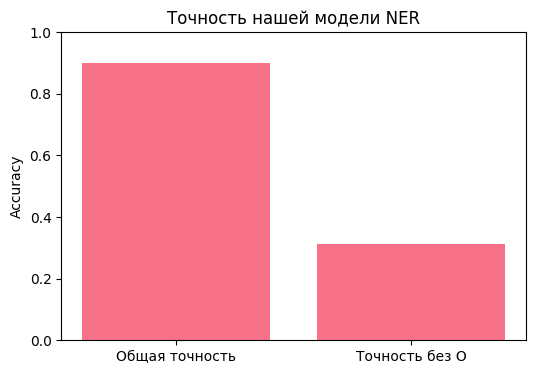

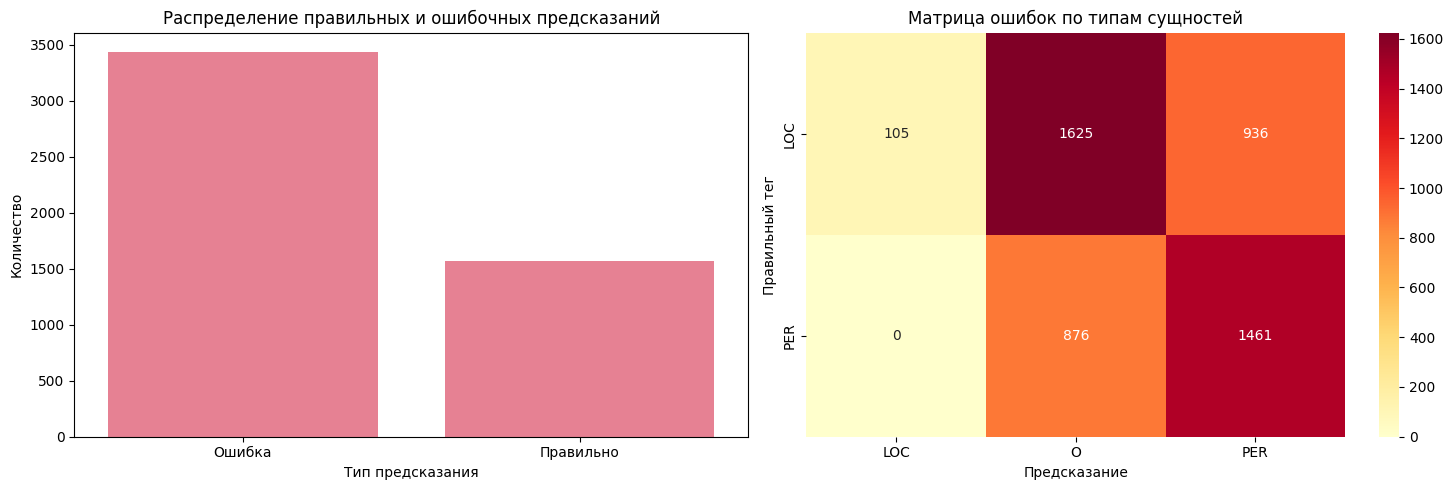


–ü—Ä–∏–º–µ—Ä—ã –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:
           –¢–æ–∫–µ–Ω –ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
245         –°–∞–∏–¥            PER          PER
247       –ú–∞—Ö–º—É–¥            PER          PER
281      –ê–ª–µ–∫—Å–µ—è            PER          PER
282  –ö—É–∑—å–º–∏—Ü–∫–æ–≥–æ            PER          PER
314         –Ø–∫—É–ø            PER          PER

–ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:
           –¢–æ–∫–µ–Ω –ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
56   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC            O
61   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC            O
63   –í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫            LOC            O
139    –†–æ—Å—Å–∏–∏¬ª\n            LOC            O
141       –õ–µ–Ω–∏–Ω–∞            LOC            O


In [20]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsNERTagger,
    Doc
)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

unique_tags = {'LOC', 'PER'}
LOC_TAGS = ['COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE']
PER_TAGS = ['LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME']

def detailed2default(tags: list) -> list:
    """ Replace NER-tags to default: LOC and PER.

    Map of default tags:

    LOC: 'COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE'

    PER: 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME'

    :param tags: NER-tags for text tokens.
    :return: Relabeled NER-tokens.
    """
    return [f'LOC' if tag.split('-')[-1] in LOC_TAGS else
            f'PER' if tag.split('-')[-1] in PER_TAGS else
            tag for tag in tags]

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º tag_tokens
def evaluate_model(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        # –ò—Å–ø–æ–ª—å–∑—É–µ–º tag_tokens –≤–º–µ—Å—Ç–æ Natasha
        tagged = tag_tokens(row['tokens'])
        pred_tags = ['O'] * len(true_tags)
        
        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã tag_tokens –≤ —Ñ–æ—Ä–º–∞—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
        for i, (token, tag) in enumerate(tagged):
            if tag in LOC_TAGS:
                pred_tags[i] = 'LOC'
            elif tag in PER_TAGS:
                pred_tags[i] = 'PER'
        
        # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        results['true'].extend(true_tags)
        results['pred'].extend(pred_tags)
        results['tokens'].extend(row['tokens'])
    
    return results

# –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = evaluate_model(df)

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –±–µ–∑ —É—á–µ—Ç–∞ —Ç–µ–≥–∞ O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏:")
print(f"–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: {accuracy_no_o:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.figure(figsize=(6, 4))
plt.bar(['–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å', '–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ O'], [accuracy, accuracy_no_o])
plt.title('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ NER')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
analysis_df = pd.DataFrame({
    '–¢–æ–∫–µ–Ω': results['tokens'],
    '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥': results['true'],
    '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ': results['pred']
})

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–Ω–µ O)
significant_df = analysis_df[analysis_df['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] != 'O'].copy()
significant_df['–¢–∏–ø'] = significant_df.apply(
    lambda x: '–ü—Ä–∞–≤–∏–ª—å–Ω–æ' if x['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] == x['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ'] else '–û—à–∏–±–∫–∞', 
    axis=1
)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—à–∏–±–æ–∫ –∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=significant_df, x='–¢–∏–ø')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –∏ –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.xlabel('–¢–∏–ø –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

plt.subplot(1, 2, 2)
confusion_matrix_df = pd.crosstab(
    significant_df['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'], 
    significant_df['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']
)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlOrRd')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ø–æ —Ç–∏–ø–∞–º —Å—É—â–Ω–æ—Å—Ç–µ–π')

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤
print("\n–ü—Ä–∏–º–µ—Ä—ã –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
correct_examples = significant_df[significant_df['–¢–∏–ø'] == '–ü—Ä–∞–≤–∏–ª—å–Ω–æ'].head()
print(correct_examples[['–¢–æ–∫–µ–Ω', '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥', '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']])

print("\n–ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
error_examples = significant_df[significant_df['–¢–∏–ø'] == '–û—à–∏–±–∫–∞'].head()
print(error_examples[['–¢–æ–∫–µ–Ω', '–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥', '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']])


In [80]:
from ipymarkup import show_span_box_markup

print("\n–ü–µ—Ä–≤—ã–µ 500 —Ç–æ–∫–µ–Ω–æ–≤ —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:")
tokens = analysis_df['–¢–æ–∫–µ–Ω'].tolist()[:500]
true_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['–¢–æ–∫–µ–Ω'])
        true_spans.append((start, end, row['–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–µ–≥']))

text = ' '.join(tokens)
show_span_box_markup(text, true_spans)

print("\n–¢–µ –∂–µ —Ç–æ–∫–µ–Ω—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:")
pred_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['–¢–æ–∫–µ–Ω'])
        pred_spans.append((start, end, row['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ']))

show_span_box_markup(text, pred_spans)


–ü–µ—Ä–≤—ã–µ 500 —Ç–æ–∫–µ–Ω–æ–≤ —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:



–¢–µ –∂–µ —Ç–æ–∫–µ–Ω—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–æ–π:


–ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç–µ, —á—Ç–æ –≤—Å–µ –≤–∞—à–∏ –ø—Ä–∞–≤–∏–ª–∞ —Ä–∞–±–æ—Ç–∞—é—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –∏ –Ω–µ –∫–æ–Ω—Ñ–ª–∏–∫—Ç—É—é—Ç –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º.

–ù–µ —É–≤–µ—Ä–µ–Ω, —á—Ç–æ —ç—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–∏—Ç—å, –Ω–æ —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ, —É –Ω–∞—Å –µ—Å—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –æ–∫–æ–ª–æ 30% –¥–ª—è —Ç–∞–∫–∏—Ö —Å–ª–æ–∂–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.
–ú—ã –ø–æ—Å—Ç–∞—Ä–∞–ª–∏—Å—å —É–±—Ä–∞—Ç—å –∫–æ–Ω—Ñ–ª–∏–∫—Ç—ã –ø—Ä–∞–≤–∏–ª –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º –ø—É—Ç–µ–º –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∏—Ö –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ.

# BERT

–°–Ω–∞—á–∞–ª–∞ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ train –∏ test –∏ —Å–¥–µ–ª–∞–µ–º –∑–∞–º–µ—Ä Natasha –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º —Å–ø–ª–∏—Ç–µ

In [9]:
test = df.iloc[:1000]
train = df.iloc[1000:]

In [19]:
# –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = evaluate_model(test)
print(results["true"])
print(results["pred"])

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è Natasha –±–µ–∑ —É—á–µ—Ç–∞ —Ç–µ–≥–∞ O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è Natasha:")
print(f"–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: {accuracy_no_o:.4f}")

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'O', 'LOC', 'LOC', 'O', 'LOC', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'PER', 

–ó–∞–≥—Ä—É–∑–∏–º –º–æ–¥–µ–ª—å –∏ –ø—Ä–æ–≥–æ–Ω–∏–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º —Å–µ—Ç–µ

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("./bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("./bert-base-NER").cuda()

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

ner_classes_dict = {
    "I-PER": "PER",
    "B-PER": "PER",
    "I-LOC": "LOC",
    "B-LOC": "LOC"
}

def evaluate_bert(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        bert_pred = ['O'] * len(true_tags)
        inference_results = ner_pipeline(text)
        for res in inference_results:
            # print(bert_pred)
            # print(res["index"] - 1)
            if res["index"] > len(true_tags):
                continue
            bert_pred[res["index"] - 1] = ner_classes_dict.get(res["entity"], "O")

        results['true'].extend(true_tags)
        results['pred'].extend(bert_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

results = evaluate_bert(test)

true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è BERT:")
print(f"–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: {accuracy_no_o:.4f}")

Some weights of the model checkpoint at /home/max/models/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è BERT:
–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.8934
–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: 0.0868


–ö–∞–∫ –≤–∏–¥–∏–º, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–µ. –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –Ω–∞ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification

labels = list(set(all_tags))
label2id = {k: v for v, k in enumerate(labels)}
id2label = dict((v, k) for k, v in label2id.items())

device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = AutoTokenizer.from_pretrained("./bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained(
    "./bert-base-NER",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

/home/max/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/max/models/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the m

In [10]:
import ast

import datasets

train['tokens'] = train['tokens'].astype(str).apply(lambda x: ast.literal_eval(x))
train['ner_tags'] = train['ner_tags'].astype(str).apply(lambda x: ast.literal_eval(x))

train = train.sample(frac=1)
train_ds = datasets.Dataset.from_pandas(
    train.reset_index().drop('index', axis=1)
)

/tmp/ipykernel_150092/1147643212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokens'] = train['tokens'].astype(str).apply(lambda x: ast.literal_eval(x))
/tmp/ipykernel_150092/1147643212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ner_tags'] = train['ner_tags'].astype(str).apply(lambda x: ast.literal_eval(x))


In [11]:
def tokenize_and_align_labels(ds: datasets.arrow_dataset.Dataset) -> transformers.tokenization_utils_base.BatchEncoding:
    label_all_tokens = True
    tokenized_inputs = tokenizer(ds['tokens'], truncation=True, padding=True, is_split_into_words=True, max_length=512)
    labels = list()
    for i, label in enumerate(ds[f'ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = list()
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label2id[label[word_idx]])
            else:
                label_ids.append(label2id[label[word_idx]] if label_all_tokens else -100)
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs['labels'] = labels

    return tokenized_inputs

tokenized_train_ds = train_ds.map(tokenize_and_align_labels, batched=True)

Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6532/6532 [00:01<00:00, 5181.93 examples/s]


In [12]:
from transformers import TrainingArguments, DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)
train_args = TrainingArguments(
    'bert_base_ru',
    evaluation_strategy='no',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    push_to_hub=False,
    report_to=None,
)

trainer = transformers.Trainer(
    model,
    train_args,
    train_dataset=tokenized_train_ds,
    data_collator=data_collator,
    tokenizer=tokenizer
)

# Train and validate:
trainer.train()

/home/max/envs/nlp/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_150092/1920097939.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = transformers.Trainer(


TrainOutput(global_step=4090, training_loss=0.09556022442349012, metrics={'train_runtime': 2204.0034, 'train_samples_per_second': 29.637, 'train_steps_per_second': 1.856, 'total_flos': 1.707284206608384e+16, 'train_loss': 0.09556022442349012, 'epoch': 10.0})

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("./checkpoint-4090")
model = AutoModelForTokenClassification.from_pretrained("./checkpoint-4090").cuda()

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

def evaluate_trained_bert(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        bert_pred = ['O'] * len(true_tags)
        inference_results = ner_pipeline(text)
        for res in inference_results:
            if res["index"] > len(true_tags):
                continue
            bert_pred[res["index"] - 1] = res["entity"]
            bert_pred = detailed2default(bert_pred)
        

        results['true'].extend(true_tags)
        results['pred'].extend(bert_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

results = evaluate_trained_bert(test)

true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è BERT:")
print(f"–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: {accuracy_no_o:.4f}")

Device set to use cuda:0



–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è BERT:
–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.8628
–¢–æ—á–Ω–æ—Å—Ç—å –±–µ–∑ —É—á–µ—Ç–∞ O: 0.3029


# –í—ã–≤–æ–¥—ã
* –•–æ—Ä–æ—à–æ –æ–±—É—á–µ–Ω–Ω—ã–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –ª—É—á—à–µ rule-based —Ä–µ—à–µ–Ω–∏–π
* –ù–µ–æ–±—Ö–æ–¥–∏–º–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ –Ω–∞ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å —è–∑—ã–∫), –º–æ–¥–µ–ª—å –Ω–∞—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –Ω–∞ –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ö—É–∂–µ rule-based —Ä–µ—à–µ–Ω–∏—è
* Encoder-only —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–µ–±—è –Ω–µ–ø–ª–æ—Ö–æ, –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω—ã–µ encoder-decoder –∏ decoder-only
* –ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ accuracy –ø–æ –∫–ª–∞—Å—Å–∞–º –∫—Ä–æ–º–µ "O" –±–æ–ª–µ–µ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–∞

# –í–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è
* –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è bert large –≤–º–µ—Å—Ç–æ base
* –ü—Ä–µ—Ç—Ä–µ–π–Ω –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ, –ª–∏–±–æ —Ñ–∞–π–Ω—Ç—é–Ω —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω–æ–≥–æ –Ω–µ ner bert
* –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å roberta –∏–ª–∏ encoder-decoder, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ t5